# Support Vector Machines

In this exercise, we will be using support vector machines (SVMs) with three example 2D datasets. 
- for the first dataset, we will try SVMs with linear kernels and different C values.
- for the second dataset, we will try SVMs with rbf kernels
- for the third dataset, we will use SVMs with rbf kernels. We will train various parameters and pick the optimal parameters and visualizse results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

In [2]:
from sklearn.svm import SVC

## Loading and Visualizing Data

In [3]:
data1 = scipy.io.loadmat('ex6data1.mat')
X = data1['X']
y = data1['y']
y = y.reshape([len(y),])

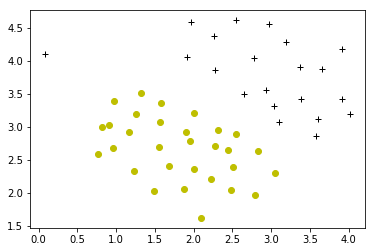

In [4]:
plt.plot(X[y==1][:,0],X[y==1][:,1],'k+')
plt.plot(X[y==0][:,0],X[y==0][:,1],'yo')
plt.show()

In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, there is an outlier positive example + on the far left at about (0.1, 4.1). 

## Training Linear SVM

###  C = 1

In [5]:
# Training Linear SVM, C = 1
clf = SVC(C=1.0, kernel='linear') 
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
# visualizeBoundaryLinear() function plots a linear decision boundary learned by the SVM
def visualizeBoundaryLinear(X,y,clf):
    # plot data
    plt.plot(X[y==1][:,0],X[y==1][:,1],'k+')
    plt.plot(X[y==0][:,0],X[y==0][:,1],'yo')
    # plot boundary
    w = clf.coef_[0]
    b = clf.intercept_[0]
    xp = np.linspace(0,5,50)
    yp = -(w[0]*xp + b)/w[1]
    plt.plot(xp, yp, '-b')
    plt.xlim([0,5])
    plt.ylim([1,5])

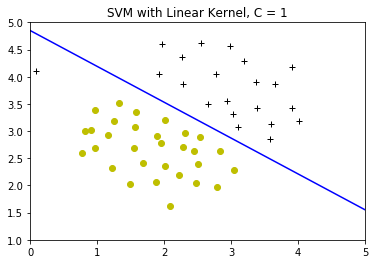

In [7]:
visualizeBoundaryLinear(X,y,clf)
plt.title('SVM with Linear Kernel, C = 1')
plt.show()

In [8]:
# visualizeBoundaryLinear() function plots a linear decision boundary learned by the SVM,
# as well as support vectors
def visualizeBoundarySupportLinear(X,y,clf):
    # plot data
    plt.plot(X[y==1][:,0],X[y==1][:,1],'k+')
    plt.plot(X[y==0][:,0],X[y==0][:,1],'yo')
    # plot boundary and margins
    xp = np.linspace(0,5,50)
    yp = np.linspace(1,5,50)
    Yp, Xp = np.meshgrid(yp,xp)
    xy = np.vstack([Xp.ravel(), Yp.ravel()]).T
    P = clf.decision_function(xy).reshape(Xp.shape)
    plt.contour(Xp, Yp, P, colors='b',levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1], marker = 'o', s=200, facecolors='none', edgecolors='r')
    plt.xlim([0,5])
    plt.ylim([1,5])

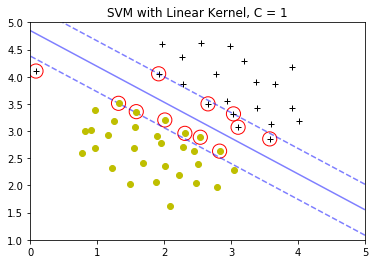

In [9]:
visualizeBoundarySupportLinear(X,y,clf)
plt.title('SVM with Linear Kernel, C = 1')
plt.show()

### C =  1000

In [10]:
# Training Linear SVM, C = 1000
clf = SVC(C=1000, kernel='linear') 
clf.fit(X, y) 

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

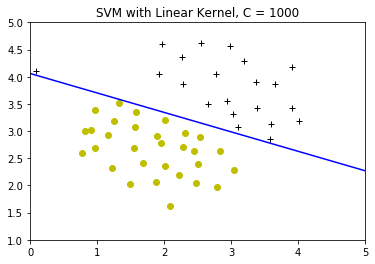

In [11]:
visualizeBoundaryLinear(X,y,clf)
plt.title('SVM with Linear Kernel, C = 1000')
plt.show()

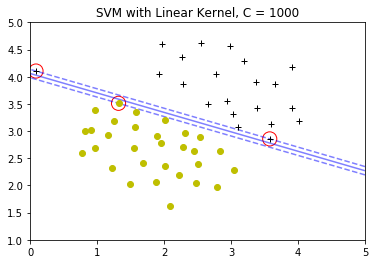

In [12]:
visualizeBoundarySupportLinear(X,y,clf)
plt.title('SVM with Linear Kernel, C = 1000')
plt.show()

## Implementing Gaussian Kernel

In [13]:
# gaussianKernel() returns a radical basis function kernel between x1 and x2
# although this is not needed with sklearn's SVM method
def gaussianKernel(x1, x2, sigma):
    x1 = x1[:]
    x2 = x2[:]
    diff = x1 - x2
    sd = np.dot(diff.T, diff)
    de = 2*(sigma**2)
    sim = np.exp(-sd/float(de))
    return sim

In [14]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {}: {}'.format(sigma, sim))

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2: 0.324652467358


## Visualizing Dataset 2

In [15]:
data2 = scipy.io.loadmat('ex6data2.mat')
X = data2['X']
y = data2['y']
y = y.reshape([len(y),])

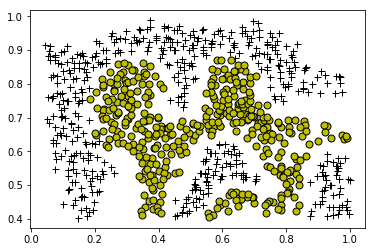

In [16]:
plt.plot(X[y==1][:,0],X[y==1][:,1],'k+', markersize = 7, linewidth = 1)
plt.plot(X[y==0][:,0],X[y==0][:,1],'ko', markersize = 7, markerfacecolor = 'y')
plt.show()

## Training SVM with RBF Kernel

In [17]:
sigma = 0.1
gamma = 1/(2*(sigma**2))
clf = SVC(C=1.0, kernel='rbf', gamma = gamma) 
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# visualizeBoundarySupport() function plot a non-linear decision boundary learned by SVM 
def visualizeBoundarySupport(X,y,clf):
    # plot data
    plt.plot(X[y==1][:,0],X[y==1][:,1],'k+')
    plt.plot(X[y==0][:,0],X[y==0][:,1],'yo')
    # plot boundary and margins
    xp = np.linspace(np.min(X[:,0]),np.max(X[:,0]),50)
    yp = np.linspace(np.min(X[:,1]),np.max(X[:,1]),50)
    Yp, Xp = np.meshgrid(yp,xp)
    xy = np.vstack([Xp.ravel(), Yp.ravel()]).T
    P = clf.decision_function(xy).reshape(Xp.shape)
    plt.contour(Xp, Yp, P, colors='b',levels=[-0.5, 0, 0.5], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    #plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1], marker = 'o', s=20, facecolors='none', edgecolors='r')

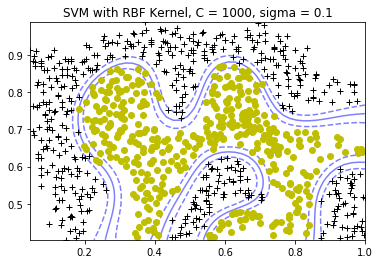

In [19]:
visualizeBoundarySupport(X,y,clf)
plt.title('SVM with RBF Kernel, C = 1000, sigma = 0.1')
plt.show()

## Visualizing Dataset 3

In [20]:
data3 = scipy.io.loadmat('ex6data3.mat')
X = data3['X']
y = data3['y']
y = y.reshape([len(y),])
Xval = data3['Xval']
yval = data3['yval']
yval = yval.reshape([len(yval),])

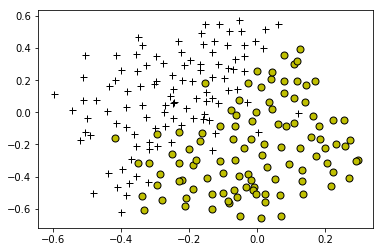

In [21]:
plt.plot(X[y==1][:,0],X[y==1][:,1],'k+', markersize = 7, linewidth = 1)
plt.plot(X[y==0][:,0],X[y==0][:,1],'ko', markersize = 7, markerfacecolor = 'y')
plt.show()

## Training SVM with RBF Kernel

In [22]:
# dataset3Params() returns our choice of C and sigma for data3
def dataset3Params(X, y, Xval, yval):
    val = np.array([0.01, 0.03, 0.1, 0.3,1,3,10,30])
    val_size = len(val)
    error = np.zeros([val_size, val_size])
    for i in range(val_size):
        for j in range(val_size):
            C = val[i]
            sigma = float(val[j])
            gamma = 1/(2*(sigma**2))
            clf = SVC(C=C, kernel='rbf', gamma = gamma) 
            clf.fit(X, y) 
            predictions = clf.predict(Xval)
            error[i,j] = np.mean(predictions!= yval)
    ind = np.argwhere(error == np.min(error))
    C = val[ind[0][0]]
    sigma = val[ind[0][1]]
    return C, sigma

In [23]:
# Try different SVM Parameters here and get the optimal C and sigma learning parameters to use 
C, sigma = dataset3Params(X, y, Xval, yval)

In [24]:
print('the optimal C for the SVM model is {}'.format(C))
print('the optimal sigma for the SVM model is {}'.format(sigma))

the optimal C for the SVM model is 1.0
the optimal sigma for the SVM model is 0.1


In [25]:
# train the SVM with the optimal C and sigma
gamma = 1/(2*(sigma**2))
clf = SVC(C=C, kernel='rbf', gamma = gamma) 
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

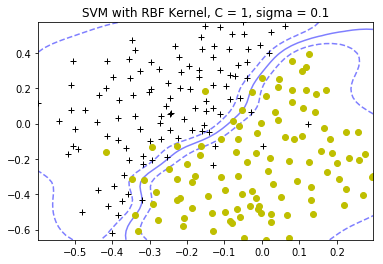

In [26]:
visualizeBoundarySupport(X,y,clf)
plt.title('SVM with RBF Kernel, C = 1, sigma = 0.1')
plt.show()